In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as sco

In [2]:
theta = np.array([10.83, 15.39, 18.99, 22.07, 24.84])
theta2 = 2*theta

Text(0.5, 0, '2$\\theta$')

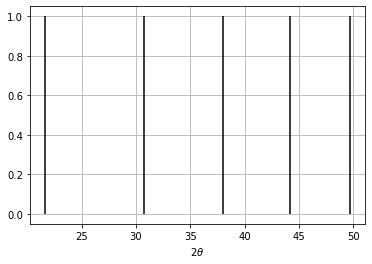

In [3]:
plt.vlines(theta2, 0, 1)
plt.grid()
plt.ylabel('')
plt.xlabel(r'2$\theta$')

In [5]:
G_sq = np.array([1, 1**2 + 1**2, 1**2 + 1**2 + 1**2, 2**2, 2**2 + 1**2])
lambda_Kalpha = 1.54e-10
sin_theta = np.sin(2*np.pi*theta/360)
sin_theta_sq = sin_theta**2

In [6]:
def func(G_sq, a):
    return (lambda_Kalpha / (2*a))**2 * G_sq

In [7]:
popt, pcov = sco.curve_fit(func, G_sq, sin_theta_sq, p0 = [1e-10])
a = popt[0]
a

4.098922190999079e-10

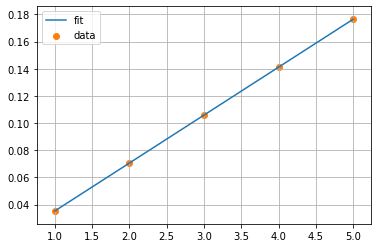

In [8]:
plt.plot(G_sq, func(G_sq, *popt), label='fit')
plt.scatter(G_sq, sin_theta_sq, label='data', color = 'C1')
plt.legend()
plt.grid()

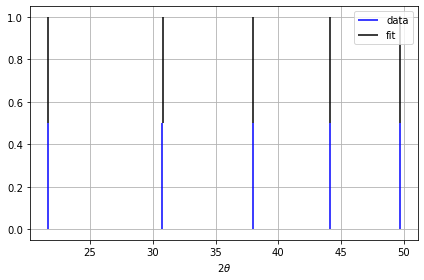

In [9]:
plt.vlines(theta2, 0, 0.5, color = 'blue', label = 'data')
plt.vlines(2 * 360/(2*np.pi) * np.arcsin(np.sqrt(func(G_sq, *popt))), 0.5, 1, color = 'black', label = 'fit')
plt.grid()
plt.ylabel('')
plt.xlabel(r'2$\theta$')
plt.legend()
plt.tight_layout()

In [10]:
mean_dev = np.mean((360/(2*np.pi) * np.arcsin(np.sqrt(func(G_sq, *popt))) - theta)**2)
mean_dev

5.796437020301531e-05

In [11]:
def angle(G_sq):
    return 360/(2*np.pi) * np.arcsin(np.sqrt(G_sq) * lambda_Kalpha / (2 * a))

In [12]:
angle(28)

83.73684470630666

In [13]:
def get_Miller(miller):
    miller_sum_sq = np.sum(miller**2)
    return miller, miller_sum_sq

In [14]:
angle(29)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in arcsin
  


nan

In [15]:
biggest_miller_sum_sq = 0
for i in range(0,5):
    for j in range(0,5):
        for k in range(0,5):
            if (k <= j and j <= i):
                miller, miller_sum_sq = get_Miller(np.array([i, j, k]))
                if (miller_sum_sq < 29 and miller_sum_sq >= biggest_miller_sum_sq):
                    biggest_miller_sum_sq = miller_sum_sq
                    biggest_miller = miller
                    print(f'Miller: {miller} \t sum_sq: {miller_sum_sq}')

Miller: [0 0 0] 	 sum_sq: 0
Miller: [1 0 0] 	 sum_sq: 1
Miller: [1 1 0] 	 sum_sq: 2
Miller: [1 1 1] 	 sum_sq: 3
Miller: [2 0 0] 	 sum_sq: 4
Miller: [2 1 0] 	 sum_sq: 5
Miller: [2 1 1] 	 sum_sq: 6
Miller: [2 2 0] 	 sum_sq: 8
Miller: [2 2 1] 	 sum_sq: 9
Miller: [2 2 2] 	 sum_sq: 12
Miller: [3 2 0] 	 sum_sq: 13
Miller: [3 2 1] 	 sum_sq: 14
Miller: [3 2 2] 	 sum_sq: 17
Miller: [3 3 0] 	 sum_sq: 18
Miller: [3 3 1] 	 sum_sq: 19
Miller: [3 3 2] 	 sum_sq: 22
Miller: [3 3 3] 	 sum_sq: 27


In [16]:
angle(biggest_miller_sum_sq)

77.45332766528406